In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
# Here We Convert Minutely Data to Daily Form 

def dateparse (time_in_secs):    
    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

## Reading Data and Preparation

In [5]:
df = pd.read_csv("data.csv",parse_dates=[0], date_parser=dateparse)

In [6]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 09:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 09:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 09:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 09:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 09:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Timestamp                  0
Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['Timestamp'], format="%Y-%d-%m %H:%M")
df['date'] = pd.to_datetime(df['date'])
df         = df.set_index(['date'])

In [9]:
df.Low[df.Low==1.5]     = 540   # wrong data 
df.Close[df.Close==1.5] = 540   # wrong data
df.fillna(method='ffill', inplace = True)

<ipython-input-9-82d0bddccae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Low[df.Low==1.5]     = 540   # wrong data
<ipython-input-9-82d0bddccae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Close[df.Close==1.5] = 540   # wrong data


In [10]:
# Close 

df_Close = df[["Close"]]
df_Close = df_Close.resample('D')[['Close']].last()

In [11]:
df_Close.head()

,Close
date,
2011-12-31 00:00:00+00:00,4.58
2012-01-01 00:00:00+00:00,4.84
2012-01-02 00:00:00+00:00,5.00
2012-01-03 00:00:00+00:00,5.29
2012-01-04 00:00:00+00:00,5.57


We took these periods to examine in this file. These Periods represent increasment periods. We didn't examine bear market because for us corrections which are in bull market, are important.

2011-12-30 : 2013-04-16 --> Increasment Periods

2015-01-14 : 2017-12-16 --> Increasment Periods

2018-12-16 : 2019-06-26 --> Increasment Periods

2020-03-12 : 2020-09-14 --> Increasment Periods

In [12]:
firstInc  = df_Close.loc["2012-11-28" : "2013-12-2"]
secondInc = df_Close.loc["2016-08-6" : "2017-12-16"]

In [13]:
firstInc.head()

,Close
date,
2012-11-28 00:00:00+00:00,12.24
2012-11-29 00:00:00+00:00,12.10
2012-11-30 00:00:00+00:00,12.38
2012-12-01 00:00:00+00:00,12.44
2012-12-02 00:00:00+00:00,12.38


In [14]:
secondInc.head()

,Close
date,
2016-08-06 00:00:00+00:00,582.89
2016-08-07 00:00:00+00:00,587.65
2016-08-08 00:00:00+00:00,592.17
2016-08-09 00:00:00+00:00,584.80
2016-08-10 00:00:00+00:00,593.29


## Acceleration of BTC

In [15]:
sayac = 0
firstInc["Acceleration"] = ""
firstInc["Acceleration"][0] = 0
firstInc["Bigger_10"] = 0

for i in range (len(firstInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        firstInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((firstInc["Close"][i] / firstInc["Close"][i - 1]) - 1)*100)                   
        firstInc["Acceleration"][i] = temp_cal 
        if temp_cal > 9.9:
            firstInc["Bigger_10"][i] = temp_cal
        
        
            
        
firstInc["Acceleration"] = firstInc.Acceleration.astype(float)        
      
           

<ipython-input-15-cebf454e4a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstInc["Acceleration"] = ""
<ipython-input-15-cebf454e4a8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstInc["Acceleration"][0] = 0
/home/hakan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_g

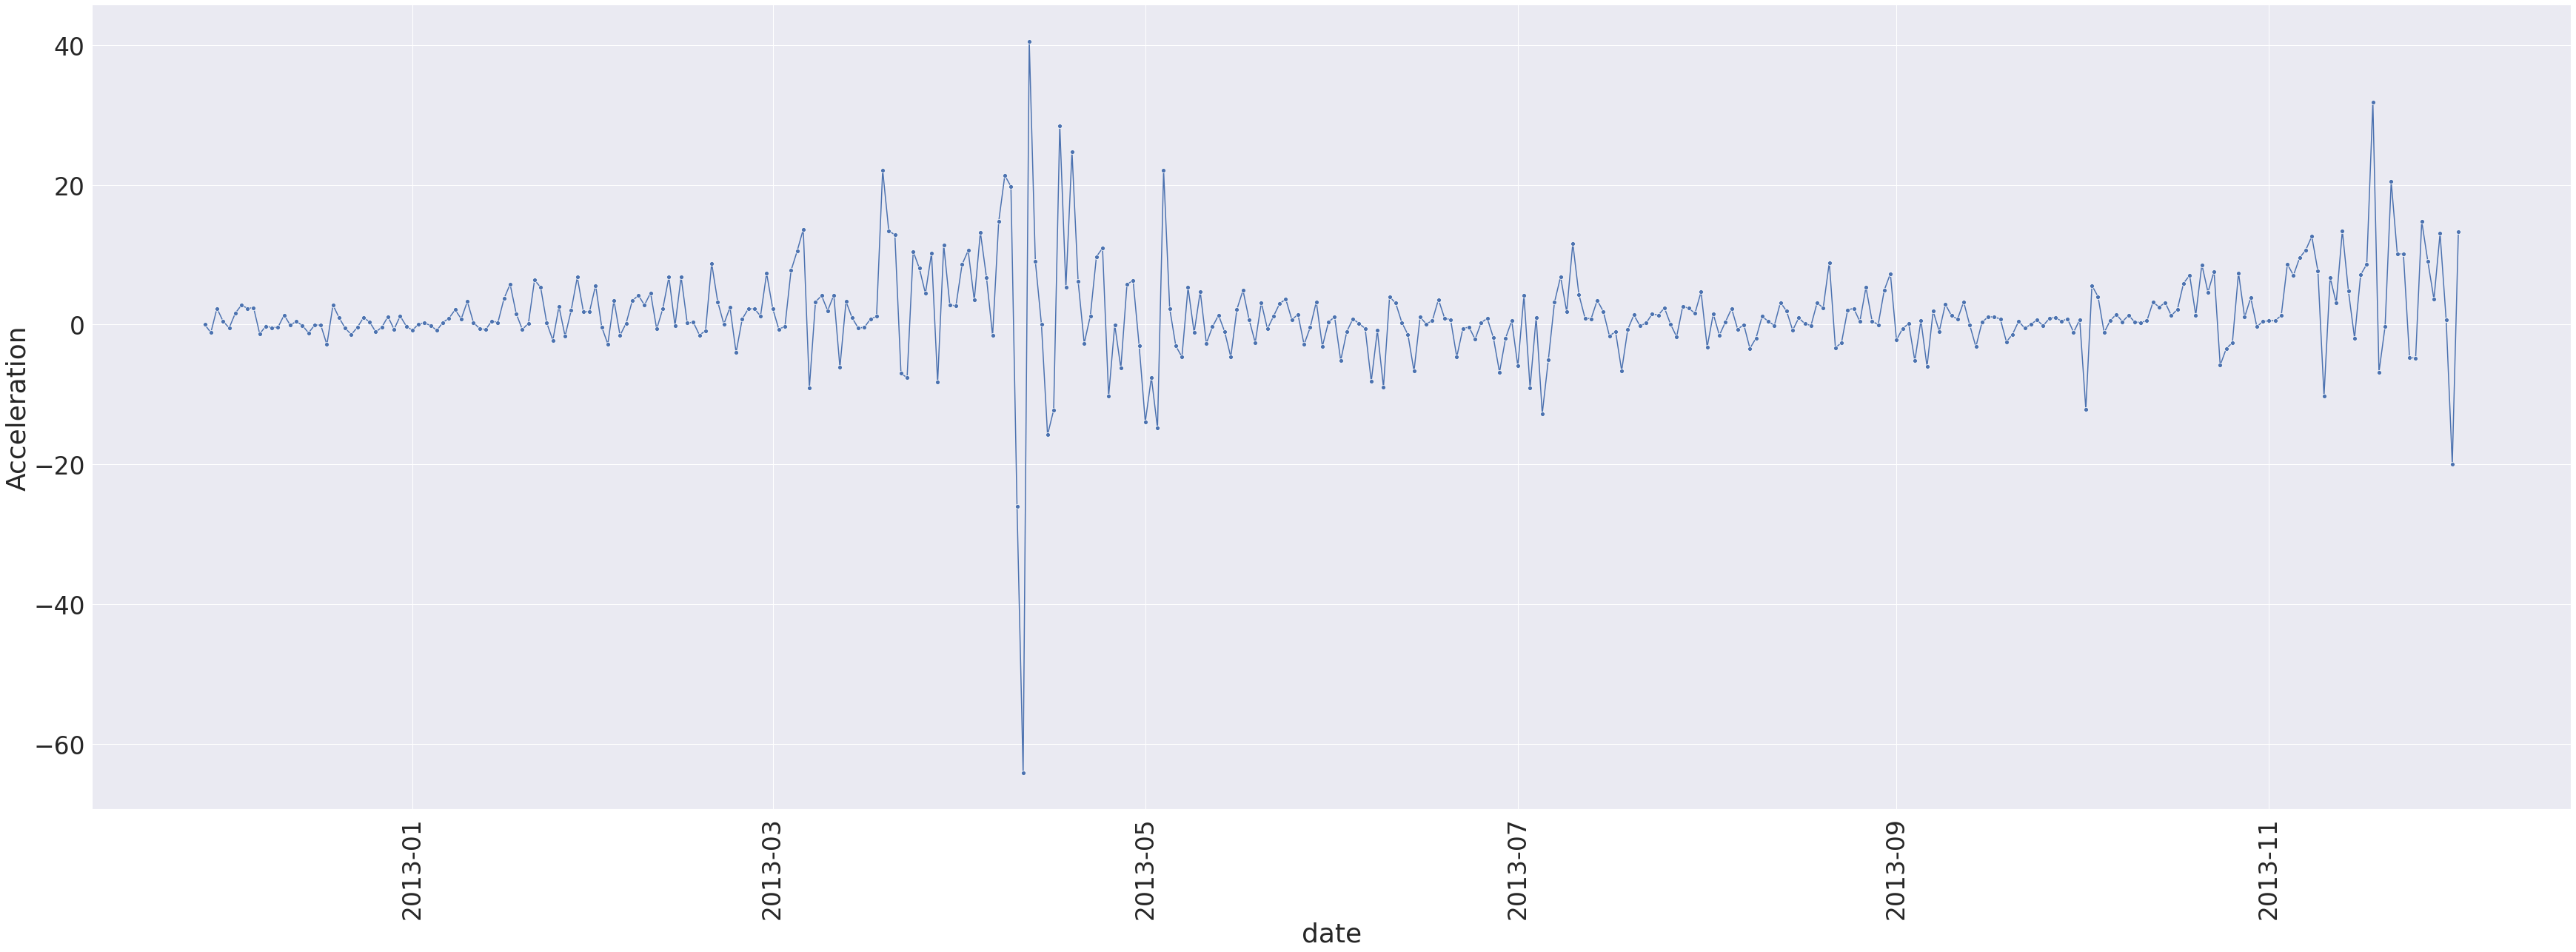

In [16]:
sns.set(font_scale = 3)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=firstInc, x=firstInc.index, y="Acceleration", marker="o")

In [28]:
firstInc.index[2:5]

DatetimeIndex(['2012-11-30 00:00:00+00:00', '2012-12-01 00:00:00+00:00',
               '2012-12-02 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq='D')

AttributeError: 'function' object has no attribute 'set_xticklabels'

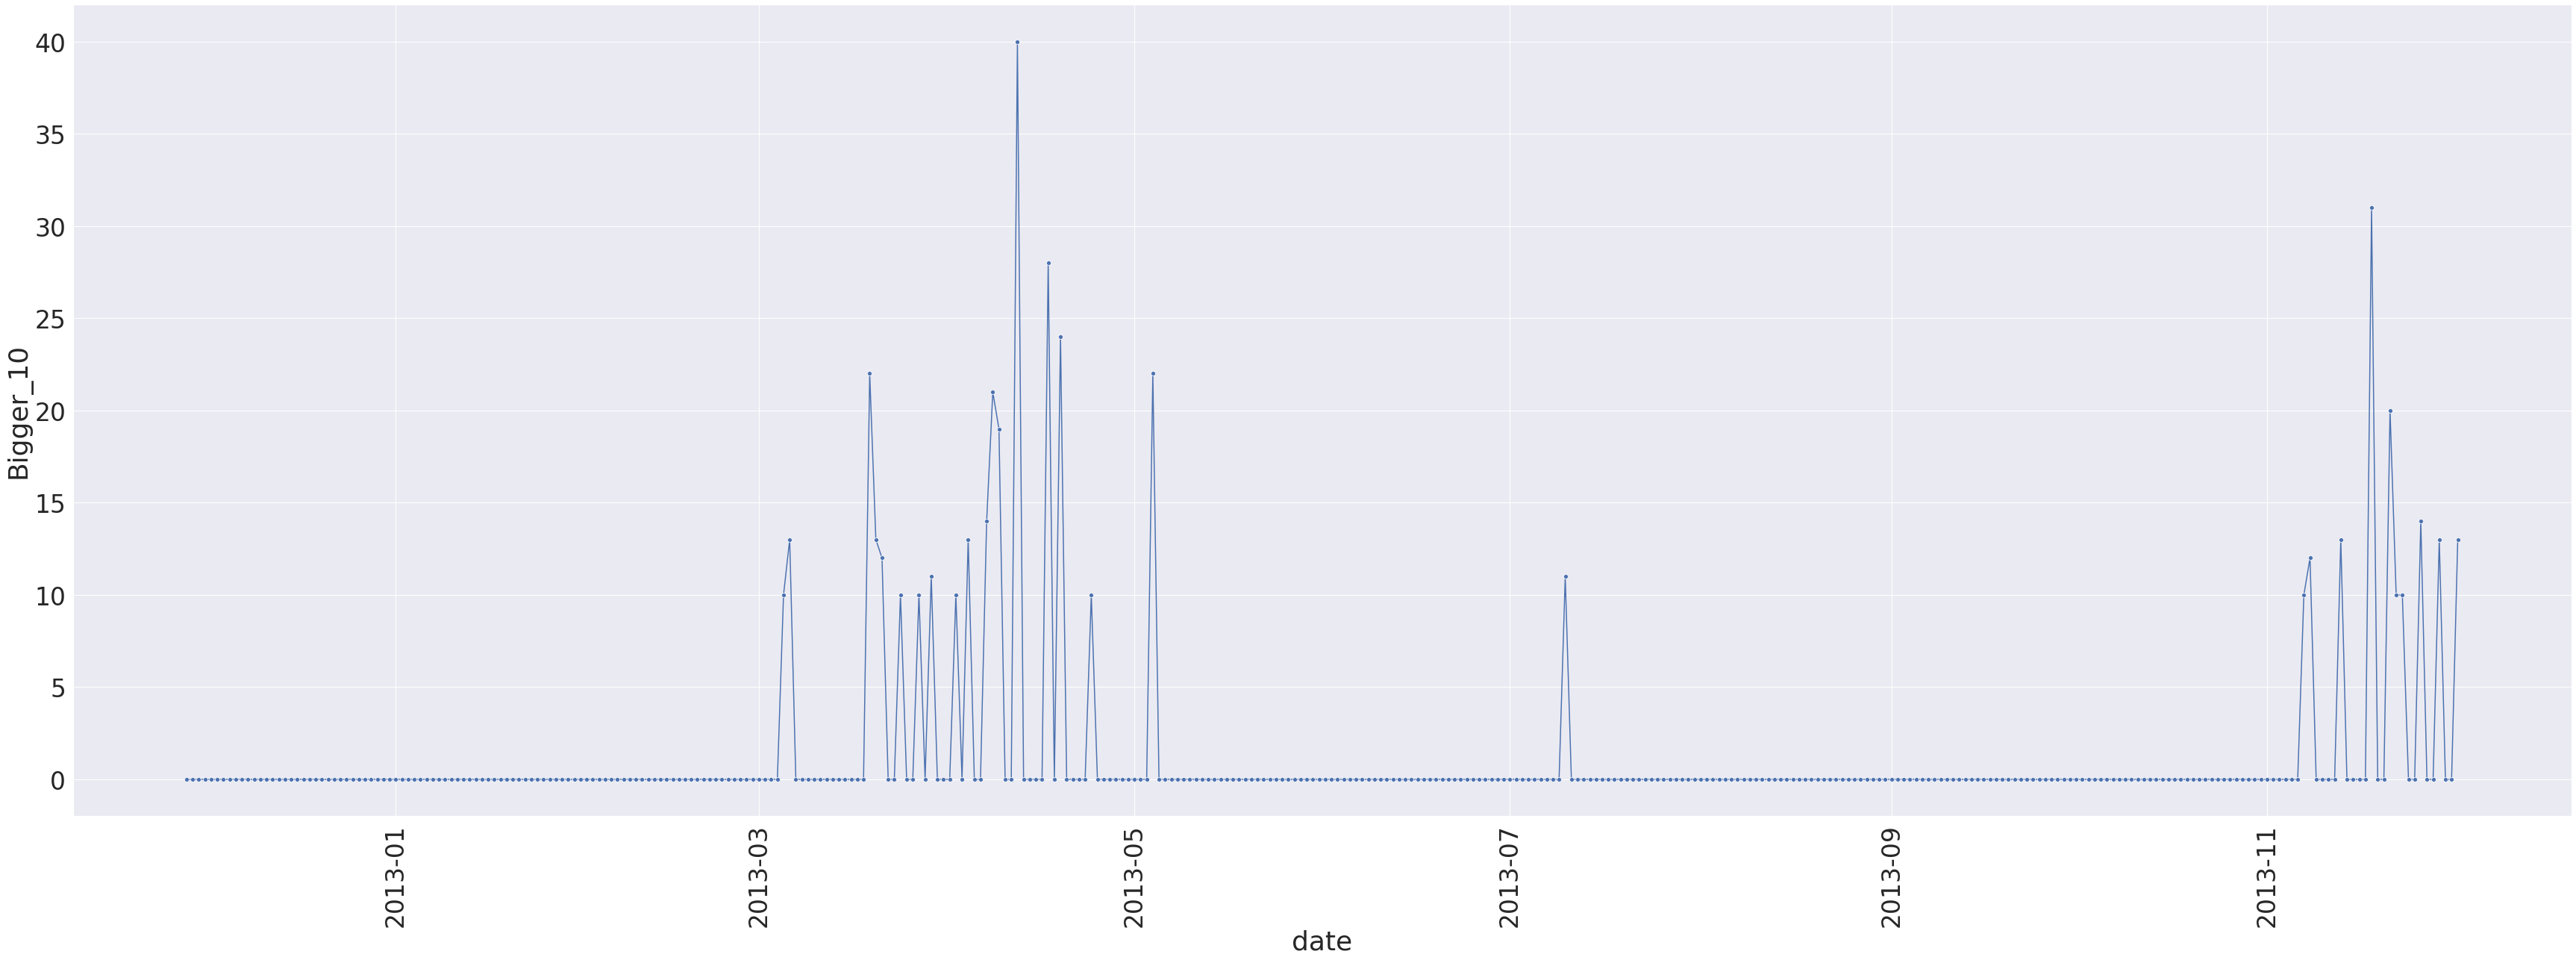

In [35]:
sns.set(font_scale = 3)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=firstInc, x=firstInc.index, y="Bigger_10", marker="o")

#line.set(xticks=firstInc.index.values )
#plt.xticks([2012-11-29, 2013-12-1])
#plt.setp.set_xticklabels(line.get_xticklabels(),rotation=30)
#line.xaxis.set_major_formatter(firstInc.index.DateFormatter("%d-%b-%Y"))
plt.show()

In [41]:
sayac = 0
secondInc["Acceleration"] = ""
secondInc["Acceleration"][0] = 0
secondInc["Bigger_10"] = 0

for i in range (len(secondInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        secondInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((secondInc["Close"][i] / secondInc["Close"][i - 1]) - 1)*100)                   
        secondInc["Acceleration"][i] = temp_cal
        if temp_cal > 9.9:
            secondInc["Bigger_10"][i] = temp_cal
        
            
        
secondInc["Acceleration"] = secondInc.Acceleration.astype(float)        
      
           

<ipython-input-41-5d3b238d61e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondInc["Acceleration"] = ""
<ipython-input-41-5d3b238d61e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondInc["Acceleration"][0] = 0
/home/hakan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user

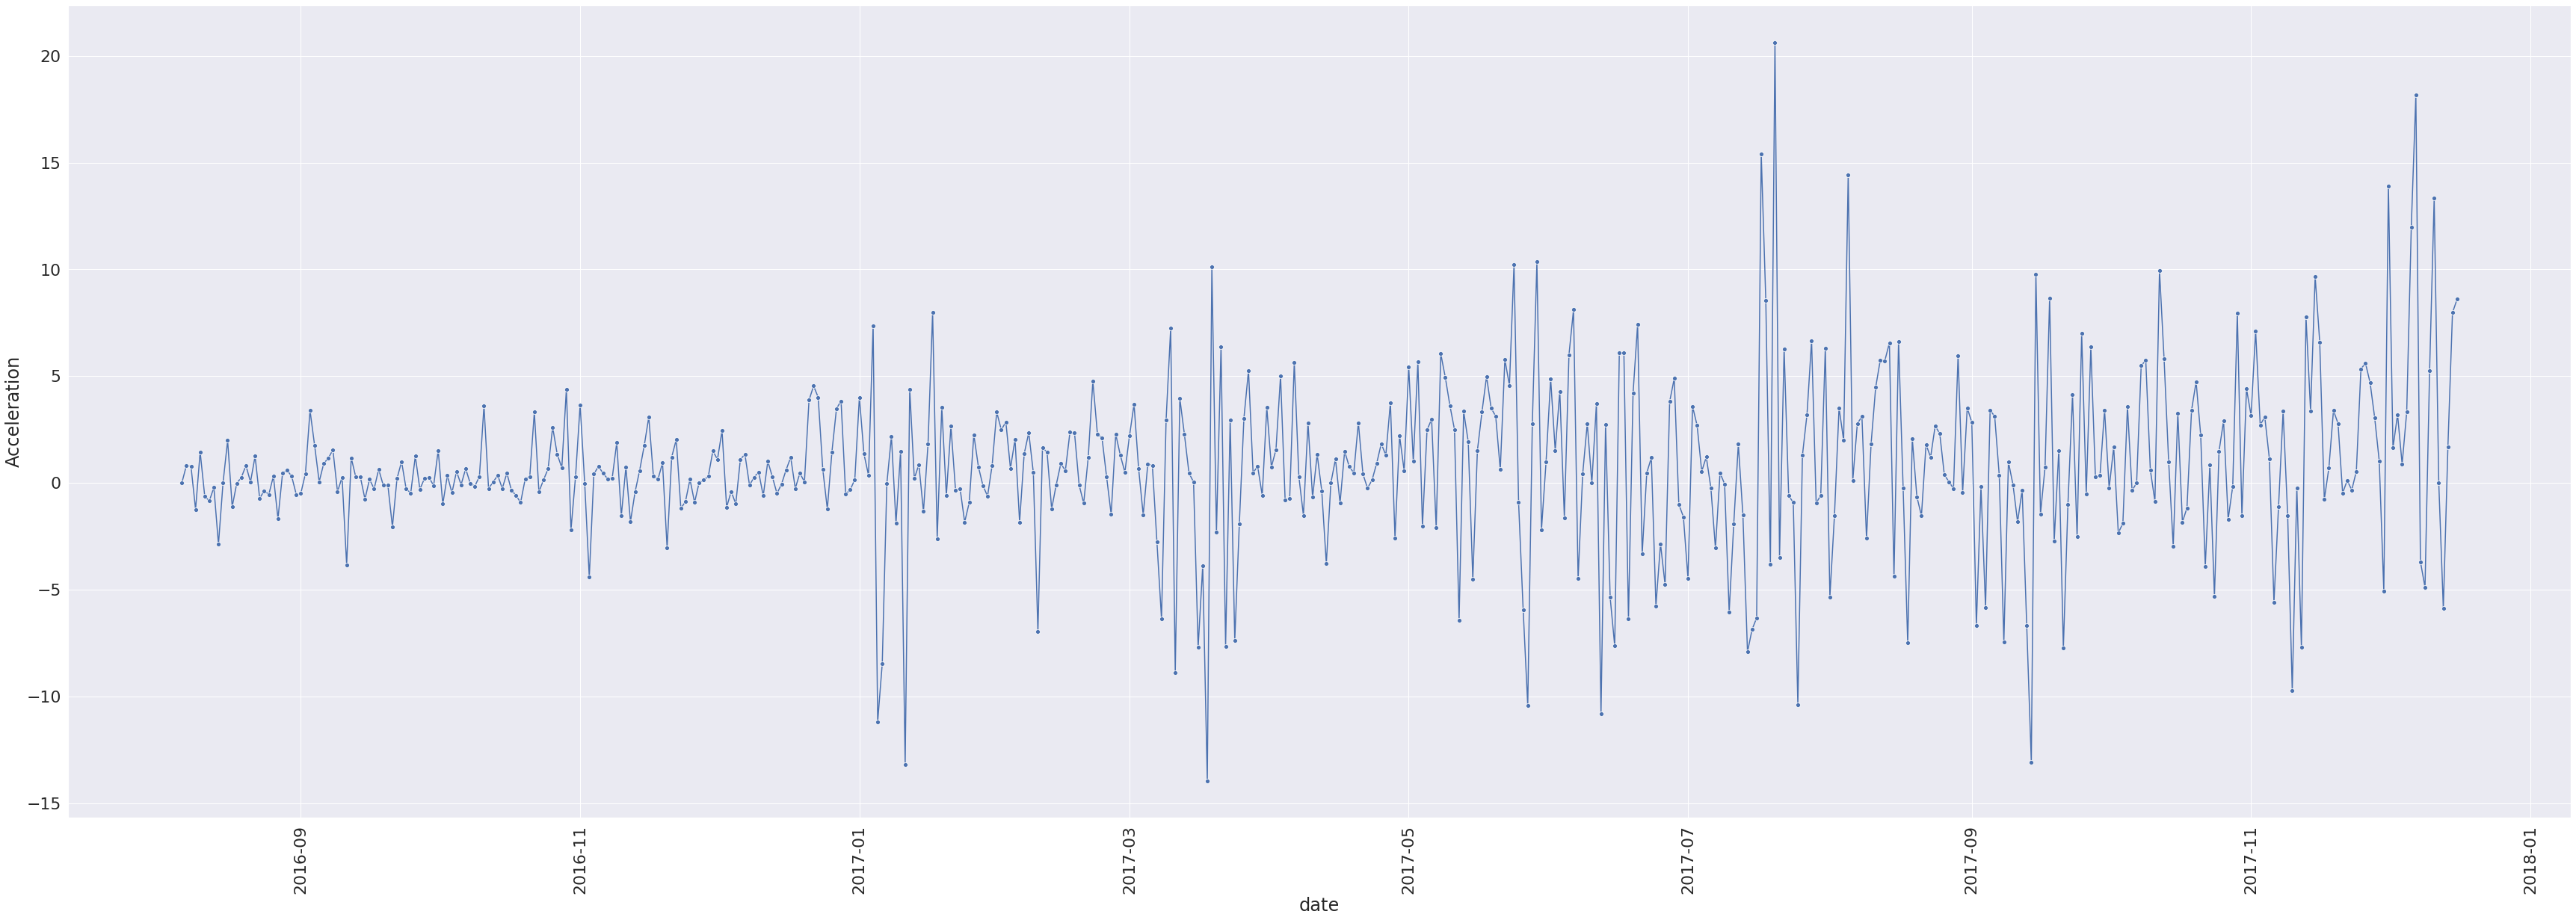

In [42]:
sns.set(font_scale = 2)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=secondInc, x=secondInc.index, y="Acceleration", marker="o")

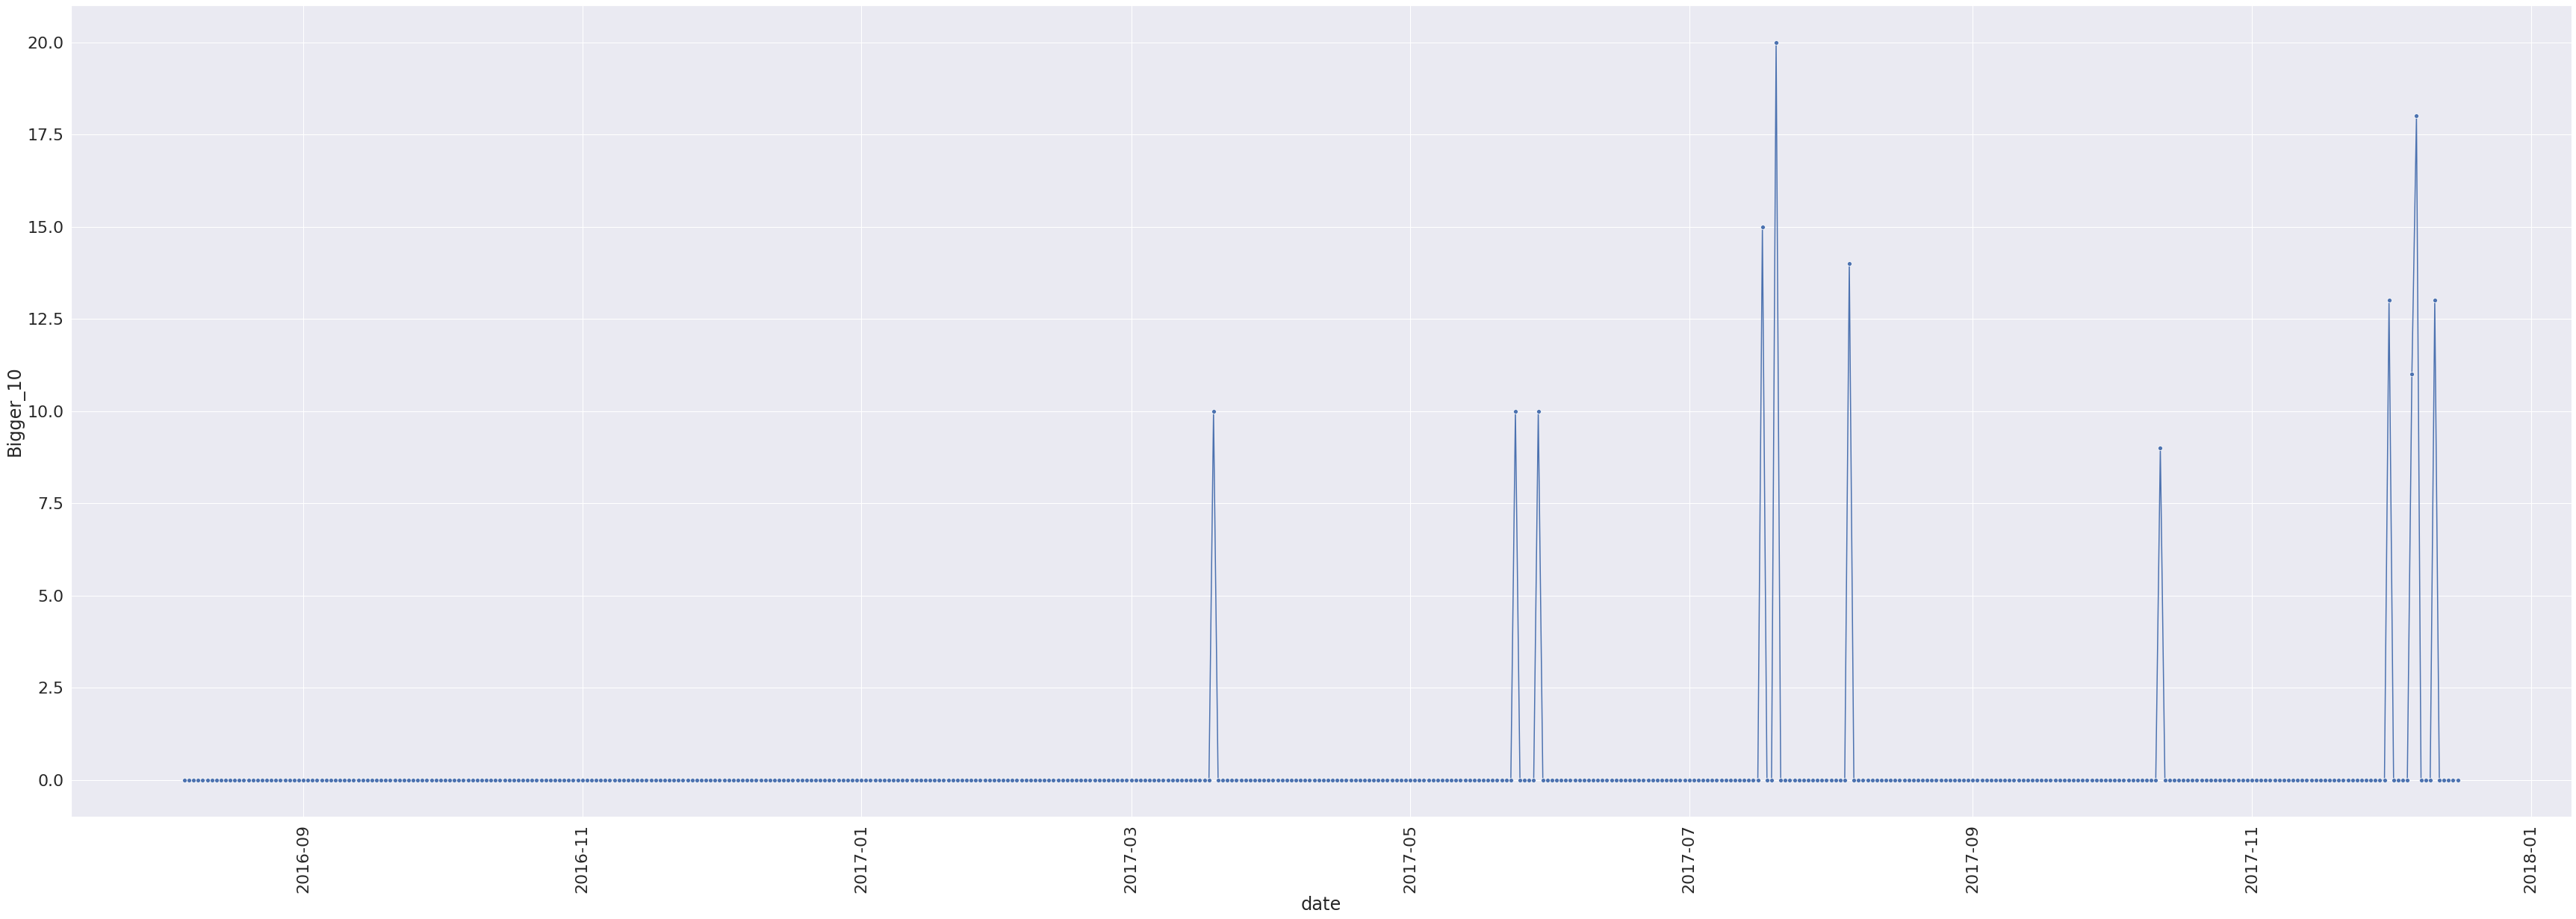

In [43]:
sns.set(font_scale = 2)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=secondInc, x=secondInc.index, y="Bigger_10", marker="o")

# Yeni dataset ile

In [36]:
df2 = pd.read_csv("btc_new_data.csv")
df2.Date = pd.to_datetime(df2.Date)
df2         = df2.set_index(['Date'])

In [37]:
thirdInc = df2[["Close"]]
thirdInc = thirdInc.loc["2020-05-4" : "2021-03-16"]

In [38]:
sayac = 0
thirdInc["Acceleration"] = ""
thirdInc["Acceleration"][0] = 0
thirdInc["Bigger_10"] = 0

for i in range (len(thirdInc["Close"])):
    if sayac == 0:
        pass
        sayac += 1
        thirdInc["Acceleration"][0] = 0 
    else: 
        
        temp_cal = (((thirdInc["Close"][i] / thirdInc["Close"][i - 1]) - 1)*100)                   
        thirdInc["Acceleration"][i] = temp_cal
        
        if temp_cal > 9.9:
            thirdInc["Bigger_10"][i] = temp_cal
        
            
        
thirdInc["Acceleration"] = thirdInc.Acceleration.astype(float)        
      

<ipython-input-38-87f24cd233fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][0] = 0
<ipython-input-38-87f24cd233fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][0] = 0
<ipython-input-38-87f24cd233fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirdInc["Acceleration"][i] = temp_cal
<ipython-input-38-87f24cd233fd>:17: SettingWithCopyWarning: 
A value is trying to be set on

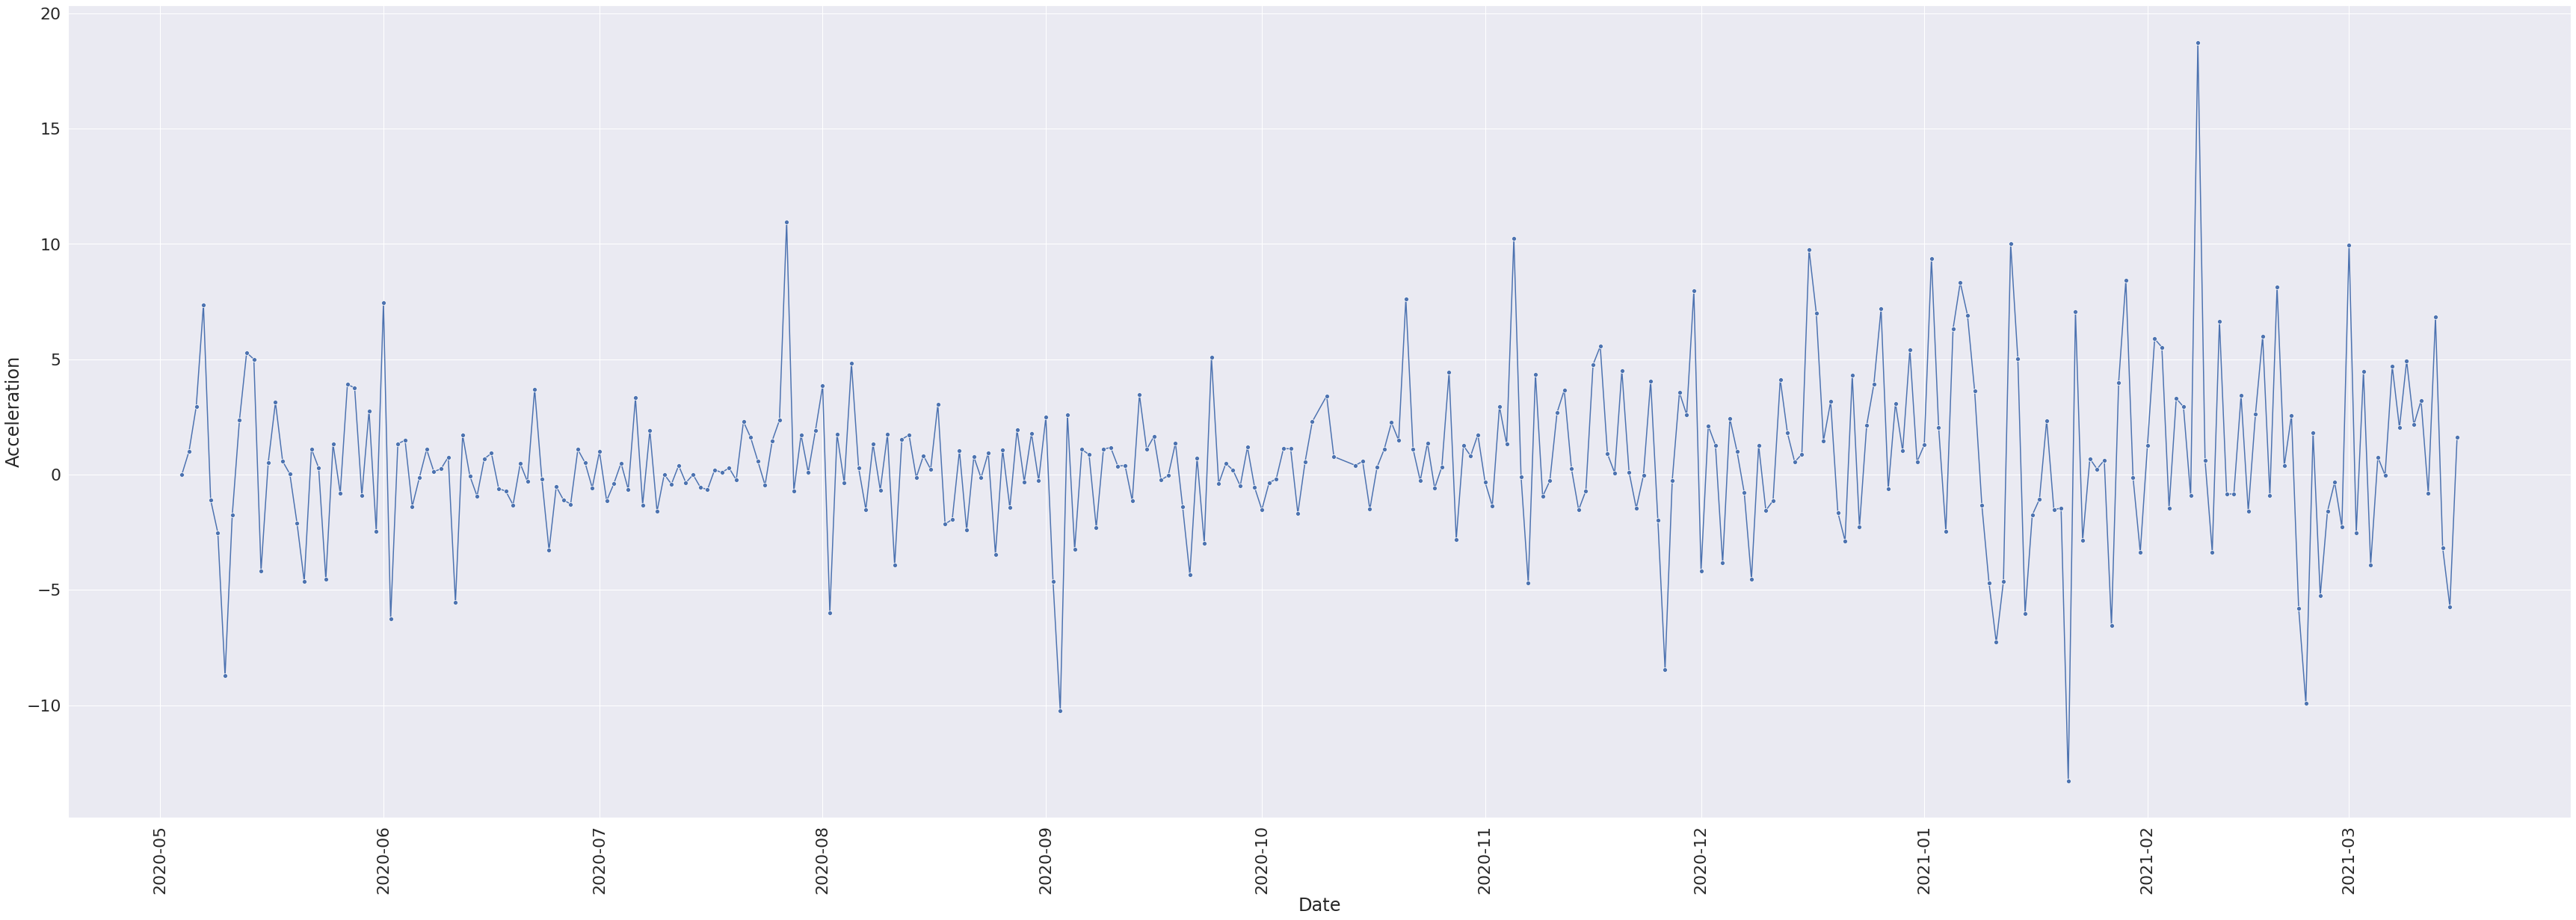

In [39]:
sns.set(font_scale = 2)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=thirdInc, x=thirdInc.index, y="Acceleration", marker="o")

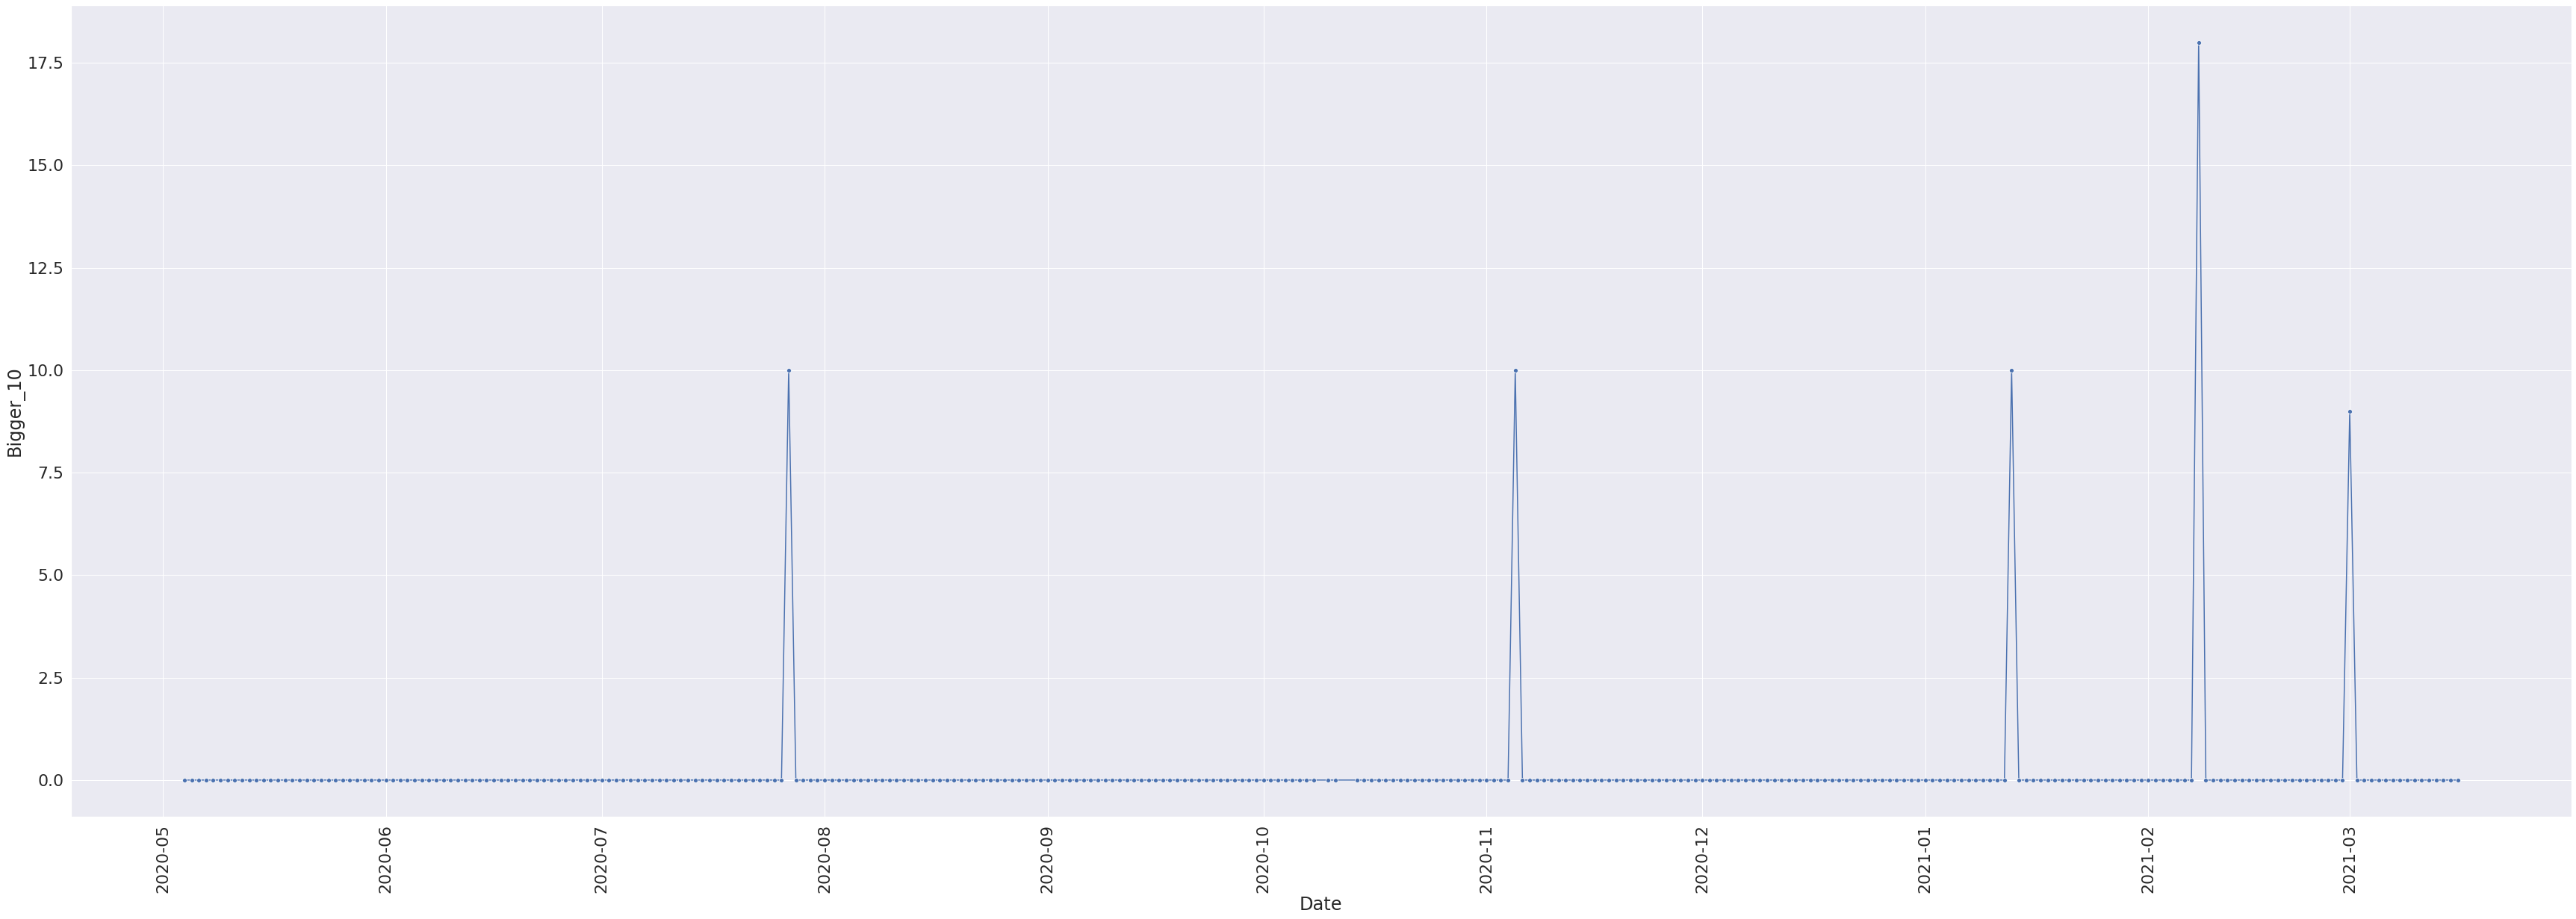

In [40]:
sns.set(font_scale = 2)
plt.subplots(figsize=(60,20))
plt.xticks(rotation=90)
line = sns.lineplot(data=thirdInc, x=thirdInc.index, y="Bigger_10", marker="o")